In [5]:
import numpy as np
import pandas as pd
import csv
from scipy.stats import kruskal,mannwhitneyu,spearmanr,pearsonr
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
def soft_max (x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [7]:
datacsv = open("surveyResults_cleaned.csv")
reader = list(csv.reader(datacsv, delimiter=',', quotechar='"'))
fields = [x.strip() for x in reader.pop(0)]

In [8]:
reader = [[cell.split("(")[0].strip() for cell in col]for col in reader]

In [9]:
novices = [x for x in reader if int(x[-3]) < 4 and int(x[-5]) < 4]
experts = [x for x in reader if int(x[-3]) > 3 and int(x[-5]) > 3]
print(len(experts))

7


In [10]:
# helper for creating softmax rankings from the survey csv data
def make_human_ranks(reader):
    ratings = pd.DataFrame(reader).values[:,1:-5].astype(int)
    ratings = ratings.T
    ratings = np.delete(ratings,1,axis=0) # removing producer
    trimmed_fields = [x.split('(')[0].strip() for x in fields[1:-5]]
    trimmed_fields.pop(1) # removing producer
    means = [x.mean() for x in ratings]
    softs = soft_max(means)
    zipped = [[f,v]for f,v in zip(trimmed_fields,softs)]
    zipped.sort(key=lambda x: x[0], reverse=True)
    for f,v in zipped:
        print("%s: %s" % (f,v))

    return np.array([float(x[1]) for x in zipped])

# spearman pearson helper
def _spearman(g1,g2):
    joined = np.array([[x,y]for x,y in zip(g1,g2)])
    test = spearmanr(joined)
#     test = pearsonr(g1,g2)
    return test

# plotting helper
def _plot_ranks(r1,r2):
    plt.figure()
    plt.ylim(-0.1,1)
    plt.xlim(-0.1,1)
    plt.plot([-1,1],[-1,1])
    plt.scatter(r1,r2)

In [11]:
# constructs the rankings for each group
print("Novices")
novice_ranks = make_human_ranks(novices)
print("\nExperts")
expert_ranks = make_human_ranks(experts)
print("\nAll Humans")
all_human_ranks = make_human_ranks(reader)

# does some tests between the sub-groups
# test_ne = kruskal(novice_ranks,expert_ranks)
# test_ne = mannwhitneyu(novice_ranks,expert_ranks)
test_ne = _spearman(novice_ranks,expert_ranks)
test_he = _spearman(all_human_ranks,expert_ranks)
test_hn = _spearman(all_human_ranks,novice_ranks)
print('\nBetween Human Groups Test Results')
print("Novices V. Experts")
print(test_ne)
# print("Humans V. Experts")
# print(test_he)
# print("Humans V. Novices")
# print(test_hn)

Novices
Worldwide Gross: 0.299871767422
Return on Investment: 0.0976513734097
Production Budget: 0.0517931230281
IMDB Votes: 0.0302855897785
IMDB Rating: 0.0843573766822
Average Critic Score: 0.355699633528
Average Audience Score: 0.0803411361513

Experts
Worldwide Gross: 0.0174833849155
Return on Investment: 0.0309594897598
Production Budget: 0.00643177787249
IMDB Votes: 0.00741947380865
IMDB Rating: 0.0970801291124
Average Critic Score: 0.827487377761
Average Audience Score: 0.0131383667701

All Humans
Worldwide Gross: 0.167137582418
Return on Investment: 0.0607032238123
Production Budget: 0.0336580824017
IMDB Votes: 0.0209448803779
IMDB Rating: 0.101374068127
Average Critic Score: 0.557769349727
Average Audience Score: 0.0584128131355

Between Human Groups Test Results
Novices V. Experts
SpearmanrResult(correlation=0.82142857142857151, pvalue=0.023448808345691505)


In [14]:
# taking the coefficient values from the two regression files
logregcoefs = [['IMDB Rating', -0.34300168957186966], ['IMDB Votes', 1.3669196119522085], ['Average Critic Score', 0.57744046973782626], ['Average Audience Score', -0.40653727105115345], ['Production Budget', -0.27290349924072632], ['Worldwide Gross', 0.69783373108027336], ['Return on Investment', 1.3457350571892375]]
gamcoefs = [['IMDB Votes', -0.726622204], ['IMDB Rating',0.157007000], ['Average Critic Score',0.109126851], ['Average Audience Score',0.003958049], ['Production Budget',-7.045378456], ['Worldwide Gross',5.623981533], ['Return on Investment',0.130592474]]
gamcoefs = np.array(gamcoefs)
logregcoefs = np.array(logregcoefs)

# mergeing the two lists and averaging 
mergedregcoefs = np.array([[x[0], (float(x[1])+float(y[1]))/2] for x,y in zip(gamcoefs,logregcoefs)])
mergedregcoefs[:,1] = soft_max(mergedregcoefs[:,1].astype(float))

mergedregcoefs = mergedregcoefs.tolist()
# sorting the same way as humans
mergedregcoefs.sort(key=lambda x: x[0], reverse=True)
for f,v in mergedregcoefs:
    print("%s: %s" % (f,v))

## for inspecting the individual regressions softmax rankings
# logregcoefs[:,1] = soft_max(logregcoefs[:,1].astype(float))
# logregcoefs = logregcoefs.tolist()
# logregcoefs.sort(key=lambda x: x[0], reverse=True)
# for f,v in logregcoefs:
#     print("%s: %s" % (f,v))


# gamcoefs[:,1] = soft_max(gamcoefs[:,1].astype(float))
# gamcoefs = gamcoefs.tolist()
# gamcoefs.sort(key=lambda x: x[0], reverse=True)
# for f,v in gamcoefs:
#     print("%s: %s" % (f,v))

Worldwide Gross: 0.7693374461761608
Return on Investment: 0.06822327746934165
Production Budget: 0.0008398609599352032
IMDB Votes: 0.019102325968666383
IMDB Rating: 0.0698664357636996
Average Critic Score: 0.04596617101656862
Average Audience Score: 0.026664482645627638


Regressions V. Experts
SpearmanrResult(correlation=0.67857142857142871, pvalue=0.093750253959831303)
Regressions V. Novices
SpearmanrResult(correlation=0.71428571428571441, pvalue=0.071343561467537592)
Regressions V. All Humans
SpearmanrResult(correlation=0.75000000000000022, pvalue=0.052181400457057762)


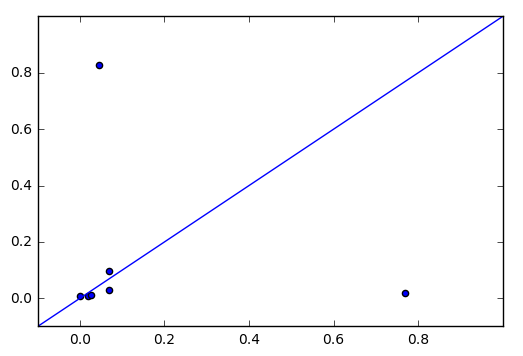

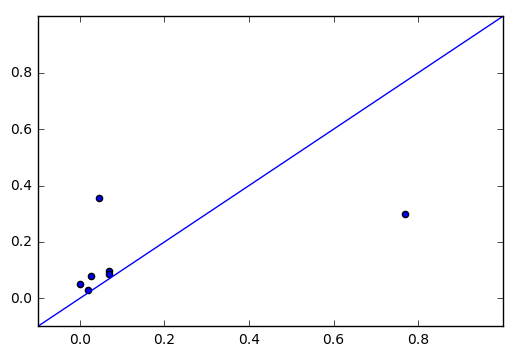

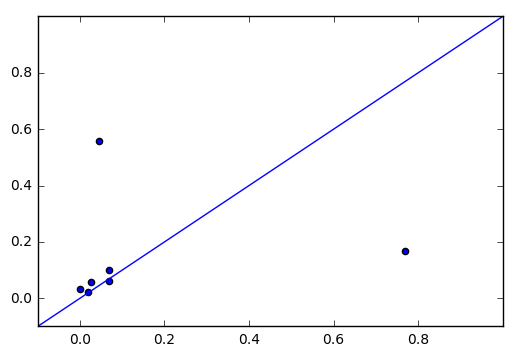

In [15]:
mergedreg = [float(x[1]) for x in mergedregcoefs]
mergedreg = np.array(mergedreg)

# test = kruskal(np.array(zipped1),np.array(logreg1), np.array(gam1))
# test2 = mannwhitneyu(np.array(zipped1),np.array(logreg1))

# test regressions against all human group permutations
print("Regressions V. Experts")
test_me = _spearman(mergedreg,expert_ranks)
print(test_me)
_plot_ranks(mergedreg,expert_ranks)
print("Regressions V. Novices")
test_mn = _spearman(mergedreg,novice_ranks)
print(test_mn)
_plot_ranks(mergedreg,novice_ranks)
print("Regressions V. All Humans")
test_mh = _spearman(all_human_ranks,np.array(mergedreg))
_plot_ranks(mergedreg,all_human_ranks)
print(test_mh)